# DBSCAN & クラスタリングの実用上の問題

In [2]:
# 表形式のデータを操作するためのライブラリ
import pandas as pd

# 行列計算をおこなうためのライブラリ
import numpy as np

# 機械学習用ライブラリsklearnのKmeansクラス
from sklearn.cluster import KMeans

# 機械学習用ライブラリsklearnのDBSCANクラス
from sklearn.cluster import DBSCAN

# グラフ描画ライブラリ
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns;
sns.set(style='ticks')
%matplotlib inline

# ファイルの操作用
import os


# 警告文を表示させないおまじない
import warnings
warnings.filterwarnings('ignore')


---
## クイズ

(L4-Q1)=
### Q1: クラスタ内誤差平方和

[第3章で用いた人工データ](https://mlnote.hontolab.org/content/kmeans-and-hierarchical-clustering.html)（University of Eastern Finlandの計算学部が公開しているデータセット）に対して，K-meansクラスタリングを適用することを考える．
データを可視化すれば最適なクラスタ数は推測できるが，ここでは最適なクラスタ数は未知であると仮定する．

当該データをデータフレームに変換し，変数`s1_df`に格納しなさい．
さらに，クラスタ数を3（`K=3`）として`s1_df`にK-meansクラスタリングを適用し，クラスタ内誤差平方和（SSE）を計算しなさい．

※ ヒント: scikit-learnライブラリを用いた場合，SSEの値はクラスタリング実行後，モデルの`inertia_`プロパティにアクセスすれば取得できる（[参考](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)）．

In [3]:
url = "http://cs.joensuu.fi/sipu/datasets/s1.txt"
s1_df = pd.read_table(url, sep="\s+", header=None, names=['x', 'y'])

# 最初の10件のデータを表示
s1_df.head(10)

x       y
0  664159  550946
1  665845  557965
2  597173  575538
3  618600  551446
4  635690  608046
5  588100  557588
6  582015  546191
7  604678  574577
8  572029  518313
9  604737  574591

In [4]:
K = 3

# クラスタリングを実行
model = KMeans(n_clusters=K, init='random')
model.fit(s1_df)

# SSEの計算
SSE = model.inertia_
SSE

213508776355610.8

(L4-Q2)=
### Q2: エルボー法によるクラスタ数の決定

Q1におけるクラスタ数`K`の値を1から20まで1ずつ変化させ，それぞれの`K`におけるクラスタ内誤差平方和を求めなさい．

In [5]:
# SSEを格納するための変数
SSEs = []

for K in range(1, 21):
    # クラスタリングを実行
    model = KMeans(n_clusters=K, init='random')
    model.fit(s1_df)
    
    # SSEの計算
    SSE = model.inertia_
    print(f'K = {K} --> SSE = {SSE}')

    # SSEを格納
    SSEs.append(SSE)

K = 1 --> SSE = 576807041183705.2
K = 2 --> SSE = 343183593424387.25
K = 3 --> SSE = 213508903491353.16
K = 4 --> SSE = 138251485155489.56
K = 5 --> SSE = 104935513328366.2
K = 6 --> SSE = 79769282312091.64
K = 7 --> SSE = 63576882802374.34
K = 8 --> SSE = 48146924629521.44
K = 9 --> SSE = 41042047966160.41
K = 10 --> SSE = 35004560933478.71
K = 11 --> SSE = 28911271571376.125
K = 12 --> SSE = 23146652003743.785
K = 13 --> SSE = 18272499282576.816
K = 14 --> SSE = 13486733767168.47
K = 15 --> SSE = 13339552719882.875
K = 16 --> SSE = 8727376544840.372
K = 17 --> SSE = 8495356626590.272
K = 18 --> SSE = 8261106460001.316
K = 19 --> SSE = 8159804257250.533
K = 20 --> SSE = 7900878544599.463


(L4-Q3)=
### Q3: エルボー法によるクラスタ数の決定

Q2で計算したクラスタ内誤差平方和の値とエルボー法を用いて，Q1のデータにK-meansを適用する際の最適なクラスタ数を決めなさい．

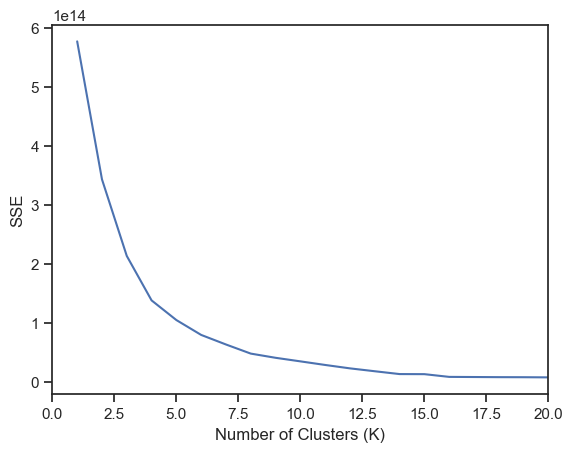

In [6]:
ax = sns.lineplot(x=[K for K in range(1, 21)], y=SSEs)
ax.set_xlim((0, 20))
ax.set_xlabel("Number of Clusters (K)")
ax.set_ylabel("SSE")
plt.show()

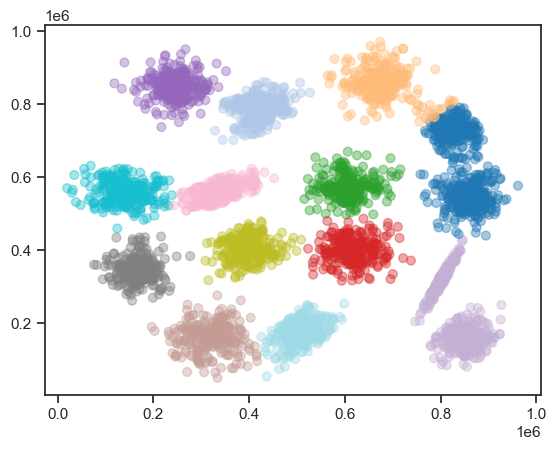

In [7]:
# クラスタリングを実行（K=13とした場合）
model = KMeans(n_clusters=13, init='random')
model.fit(s1_df)

# 結果を格納
labels = model.labels_

plt.scatter(
    s1_df.x, s1_df.y,
    c=labels,
    alpha=0.4, # 透明度
    s=40, # マーカーのサイズ
    cmap="tab20_r" # カラーパレット（20色対応）
)

---
## おまけクイズ

### Q4: データ間の距離

以下の関数`generate`は，各次元の定義域が$[-1, 1]$であるN次元空間に$K個のデータをランダムに生成する関数である．
`generate`関数はK行N列の行列を返す．

In [8]:
def generate(N, K):
    return np.random.uniform(-1, 1, (K, N))

例えば，$N=2$，$K=10$の場合，以下のように`generate`関数は2次元のデータを10個生成し，行列形式で返す．
各行がデータ点に対応する．

In [9]:
generate(N=2, K=10)

array([[ 0.71922012,  0.79404868],
       [ 0.8542639 , -0.38525764],
       [-0.76125357,  0.31773887],
       [ 0.75518281, -0.84001539],
       [ 0.68740922, -0.44412347],
       [-0.92083514, -0.66183711],
       [ 0.39883398,  0.28542706],
       [-0.97272434, -0.67785437],
       [ 0.29322609,  0.82777789],
       [-0.12805932,  0.40164165]])

`generate`関数を使ってランダムに生成された2次元の10個のデータにについて，全データ間のユークリッド距離を計算し，その結果を変数`dist`に格納しなさい．

※ ヒント: scipyライブラリの`spatial.distance.pdist`関数を用いるとよい（[参考](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist)）．

In [10]:
# 点同士の距離を計算する関数をインポート
from scipy.spatial import distance

# データ生成
D = generate(N=2, K=10)

# 距離計算
dists = distance.pdist(D)

# 表示
dists

array([1.05965184, 0.52211314, 0.30829815, 1.07456711, 0.78142813,
       1.02831203, 0.94178495, 0.68553864, 1.603236  , 1.51994411,
       1.0063873 , 0.42035117, 0.28446327, 0.85969957, 0.92833385,
       1.61625922, 1.9740061 , 0.52841058, 1.42806842, 1.25946985,
       1.20991988, 1.08377411, 0.20084444, 1.3490191 , 0.90281022,
       0.76454337, 0.75450816, 0.6527959 , 0.61005992, 1.32177749,
       0.51140827, 0.47332886, 0.57326158, 1.47417951, 1.60869184,
       0.82822971, 0.85507375, 1.37130382, 1.86909119, 0.13834446,
       1.19504786, 1.13556505, 1.06089428, 1.04665613, 1.1767042 ])

### Q5: データ間の距離の最小値と最大値

Q4で求めた距離の最小値と最大値を求め，その差の絶対値`max_dist_delta`を計算しなさい．
各次元の定義域がであるN次元空間においては，`max_dist_delta`の最大値は$2\sqrt{N}$となる．
このことを踏まえて，最大値が1となるよう`max_dist_delta`を正規化した`normalized_max_dist_delta`も計算しなさい．

※ ヒント: リストやnumpy.darrayの要素の最小値，最大値を計算するには`min`，`max`関数が使える．

#### 補足: 距離の差を$2\sqrt{N}$で正規化するのか？

各次元の定義域が[-1, 1]であるN次元空間における点同士のユークリッド距離がとりうる最大値は，
* 1次元空間では距離の最大値は$2=2\sqrt{1}$
* 2次元空間では距離の最大値は$2 \sqrt{1^2 + 1^2}=2\sqrt{2}$
* 3次元空間では距離の最大値は$2 \sqrt{1^2 + 1^2 + 1^2}=2\sqrt{3}$

となる．
この観察から分かるように，N次元空間における点同士の距離がとり得る最大値は$2\sqrt{N}$となり，次元数が増えるにつれてとりうる距離の最大値が大きくなる．
そのため，単純に最大距離と最小距離の差の「絶対値」を調べても，相対的に差が小さくなっているのか分からない．
そこで，距離を$2\sqrt{N}$で割ることで，最大距離と最小距離の差を正規化（最大値が1になるように変換）する．

In [11]:
max_dist = max(dists)
min_dist = min(dists)
max_dist_delta = max_dist - min_dist

max_dist_delta

1.8356616439063096

In [12]:
import math

normalized_max_dist_delta = max_dist_delta / (2 * math.sqrt(2))
normalized_max_dist_delta

0.6490043981850985

### Q6: 関数化

Q4とQ5で行ったことを抽象化すると，以下のように書ける：
1. 各次元の定義域が$[-1, 1]$である$N$次元空間上で$K$個のデータをランダムに生成
2. 各データ間のユークリッド距離の最小値と最大値の差を計算
3. ステップ2で求めた差を$2\sqrt{N}$で正規化した値（`normalized_max_dist_delta`）を計算

ステップ1からステップ3を任意の回数だけ繰り返し，得られた`normalized_max_dist_delta`の平均値を$\bar{\delta_{dist}}$と定義する．
$\bar{\delta_{dist}}$を求める関数`calc_mean_normalized_max_dist_delta`を定義しなさい．
なお，この関数の引数は`N`，`K`，`iter`（ステップ1からステップ3まで繰り返す回数）の3つとする．

In [13]:
def calc_normalized_max_dist_delta(N=2, K=10):  
    D = generate(N=2, K=10)
    dists = distance.pdist(D)
    max_dist = max(dists)
    min_dist = min(dists)
    max_dist_delta = max_dist - min_dist
    return max_dist_delta / (2 * math.sqrt(N))


def calc_mean_normalized_max_dist_delta(N=2, K=10, iter=50):
    max_dist_deltas = []
    for i in range(iter):
        max_dist_delta = calc_normalized_max_dist_delta(N, K)
        max_dist_deltas.append(max_dist_delta)

    return np.mean(max_dist_deltas)


calc_mean_normalized_max_dist_delta(N=100, K=50, iter=50)

0.0911202043953244

### Q7: 次元の呪い

Q6で定義した$\bar{\delta_{dist}}$について，$K=50$，$iter=100$と固定して$N$を1から1000まで1ずつ変化させたときにどのように変化するか観察しなさい．

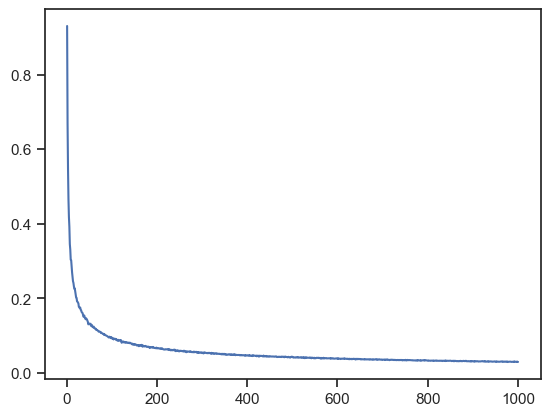

In [14]:
N_max = 1000
iter = 100
K = 50

means = []
for N in range(1, N_max + 1):
    mean_normalized_max_dist_delta = calc_mean_normalized_max_dist_delta(N, K, iter)
    means.append(mean_normalized_max_dist_delta)
    
# 折れ線グラフ上に結果を可視化
ax = sns.lineplot(x=list(range(1, N_max + 1)), y=means)
plt.show()

次元数が大きくなると，最大距離と最小距離の差がゼロに近づいていくことが分かる．
今回の実験ではN次元空間にデータがランダム（一様）に散らばっていることを想定していたが，実際はデータの分布には何らかの偏りがある．
その場合でも，高次元空間ではデータ間の類似度・距離の扱いが難しいことには変わりはない．
高次元データは特徴選択・次元圧縮などを行って，低次元データに変換して機械学習を行う必要がある．